### Downloading Zip file of dataset using API Command


In [1]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python


  0%|          | 0.00/1.55k [00:00<?, ?B/s]
100%|##########| 1.55k/1.55k [00:00<00:00, 1.58MB/s]


### Unzipping the above file in power shell usign below commands

In [9]:
##PS C:\Users\guptl> cd C:\Users\guptl\Desktop\SmartInternz\Assginment\Assignment-5
##PS C:\Users\guptl\Desktop\SmartInternz\Assginment\Assignment-5> Expand-Archive -Path ./customer-segmentation-tutorial-in-python.zip -DestinationPath ./                         

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Loading data into df DataFrame

In [107]:
df=pd.read_csv("./Mall_Customers.csv")

In [108]:
df.shape

(200, 5)

In [109]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [111]:
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [112]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [113]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [114]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### No null values

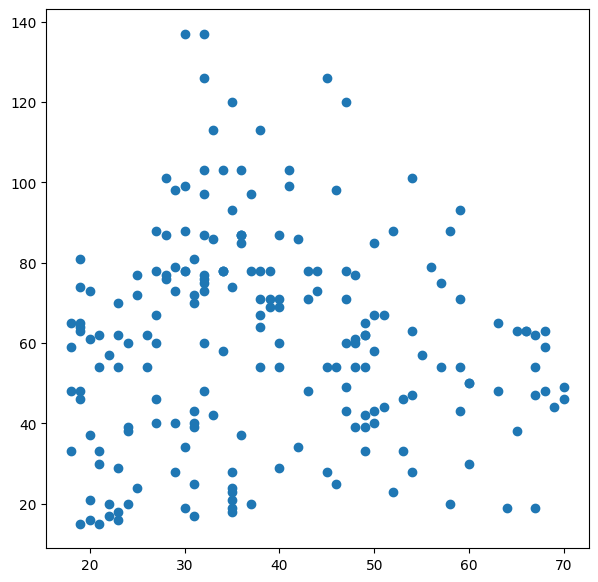

In [115]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.show()

In [116]:
df[(df['Spending Score (1-100)']>100) | (df['Spending Score (1-100)']<1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


### We can observe that there are no outliers in SpendingScore

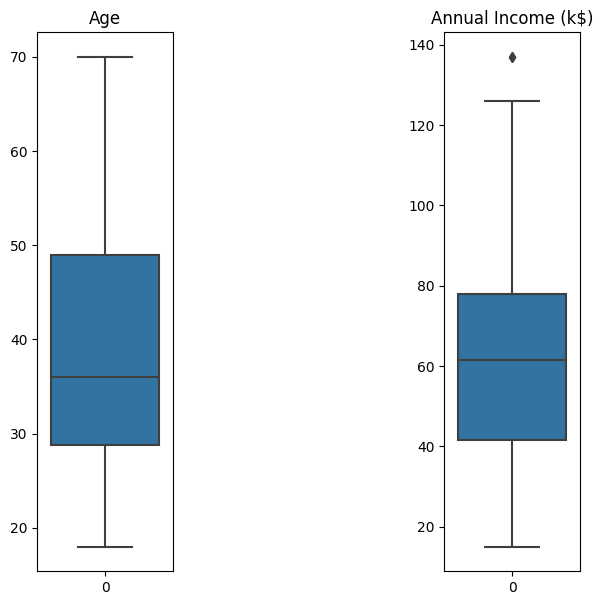

In [118]:
##Checking outliers for Age and Annual income
rcParams['figure.figsize']=7,7

for index,col in enumerate(df.columns[2:-1]):
    plt.subplot(1,2,index+1)    
    sns.boxplot(df[col])
    plt.title(col)
plt.subplots_adjust(wspace=2)
plt.show()

### We can observe that there is one outlier in Annual Income

In [119]:
q1=df['Annual Income (k$)'].quantile(.25)
q3=df['Annual Income (k$)'].quantile(.75)
med=df['Annual Income (k$)'].median()

iqr=q3-q1

ul=q3+1.5*iqr
ll=q1-1.5*iqr

df=df[(df['Annual Income (k$)']<ul) & (df['Annual Income (k$)']>ll)]

<Axes: >

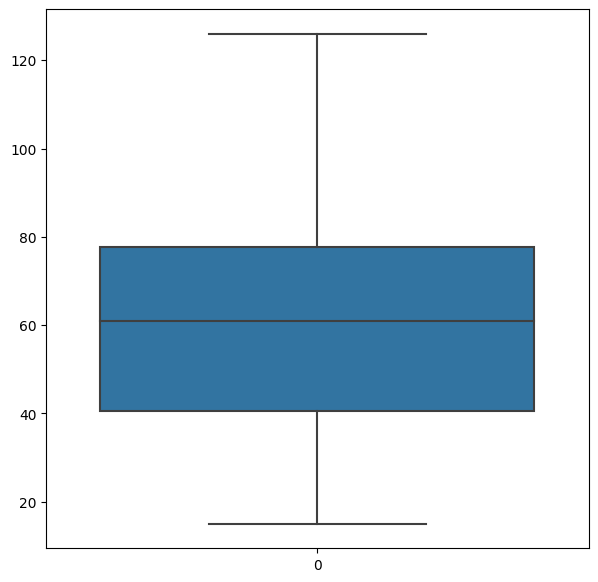

In [120]:
sns.boxplot(df['Annual Income (k$)'])

### We can observe that no outliers are there

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,39
1,2,1,0.057692,0.000000,81
2,3,0,0.038462,0.009009,6
3,4,0,0.096154,0.009009,77
4,5,0,0.250000,0.018018,40


In [184]:
X=df[['Age','Annual Income (k$)']]

In [185]:
from sklearn.cluster import KMeans
sse=[]
x=range(1,11)
for i in x:
    model=KMeans(n_clusters=i)
    model.fit(X)
    sse.append(model.inertia_)

C:\Users\guptl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guptl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guptl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guptl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [186]:
sse

[24.497660560550376,
 14.01360908098598,
 7.828967638974362,
 6.231295062091693,
 4.92203751249116,
 4.0344029002492,
 3.2558070669047083,
 2.793661892986269,
 2.454289966685289,
 2.235097815270895]

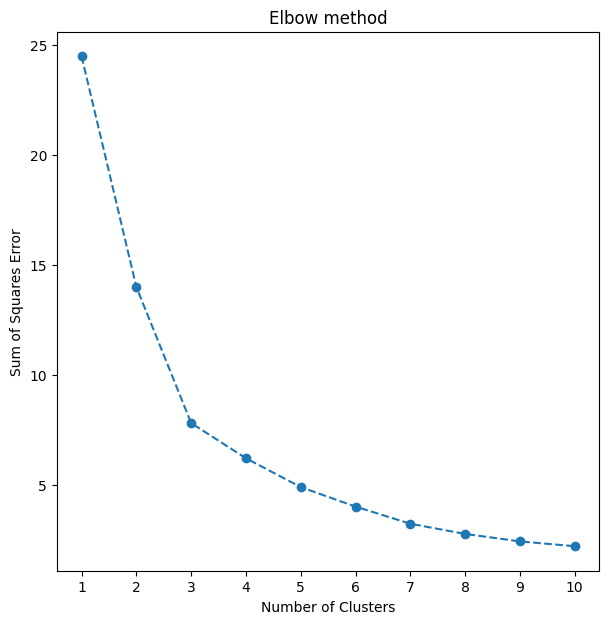

In [187]:
plt.plot(x,sse,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Error')
plt.title('Elbow method')
plt.xticks(x)
plt.show()


In [188]:
model= KMeans(n_clusters=3)
y_predict =  model.fit_predict(X)
y_predict

C:\Users\guptl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [189]:
df['clusters']=y_predict

In [190]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,0.019231,0.000000,39,2
1,2,1,0.057692,0.000000,81,2
2,3,0,0.038462,0.009009,6,2
3,4,0,0.096154,0.009009,77,2
4,5,0,0.250000,0.018018,40,2
...,...,...,...,...,...,...
193,194,0,0.384615,0.882883,91,1
194,195,0,0.557692,0.945946,16,1
195,196,0,0.326923,0.945946,79,1
196,197,0,0.519231,1.000000,28,1


### We divided customers into 3 clusters

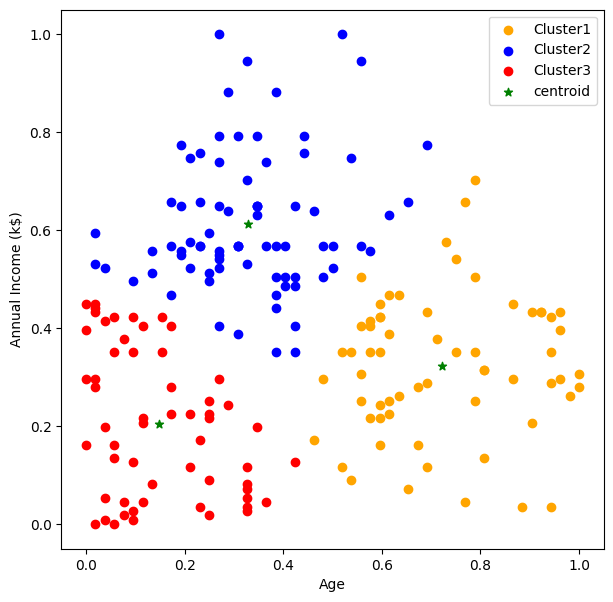

In [191]:
d1 = df[df.clusters==0]
d2 = df[df.clusters==1]
d3 = df[df.clusters==2]


plt.scatter(d1['Age'],d1['Annual Income (k$)'],color='orange',label='Cluster1')
plt.scatter(d2['Age'],d2['Annual Income (k$)'],color='blue',label='Cluster2')
plt.scatter(d3['Age'],d3['Annual Income (k$)'],color='red',label='Cluster3')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='green',marker ='*',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()